In [374]:
import nltk

nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])

[nltk_data] Downloading package names to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader

True

In [375]:
nltk.download('brown')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [376]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [377]:
import pandas as pd

# Loading FIFA 18 WC CSV file
fifa = pd.read_csv('FIFA 18 WC.csv')

In [378]:
fifa.head
fifa

,Date,Tweet,Likes,RTs
0,02/07/2018 01:35,Only two goalkeepers have saved three penaltie...,0,477
1,02/07/2018 01:35,scores the winning penalty to send into the qu...,0,1031
2,02/07/2018 01:35,Tonight we have big game,0,488
3,02/07/2018 01:35,We get stronger Turn the music up now We got t...,0,0
4,02/07/2018 01:35,Only two goalkeepers have saved three penaltie...,0,477
...,...,...,...,...
529995,15/07/2018 22:49,France have won the FIFA in Moscow,0,63163
529996,15/07/2018 22:49,Beyonc JAY performed in blue jersey to celebra...,0,687
529997,15/07/2018 22:49,They don say immigrants are ruining France whe...,0,119
529998,15/07/2018 22:49,starts for in todays final,0,1013


In [379]:
fifa_1 = fifa.copy()

**DATA CLEANING**

In [380]:
#checking for ant missing values
fifa_1.isna().any()

Date     False
Tweet     True
Likes    False
RTs      False
dtype: bool

In [381]:
#removing NAs in the Tweet column to enable the text data to be concatenating into a string
fifa_1 = fifa_1.dropna(subset=['Tweet'])

In [382]:
#checking duplicates from the dataset
number_of_duplicates = fifa_1.duplicated().sum()
print("Number of duplicate rows: ", number_of_duplicates)

Number of duplicate rows:  238591


In [383]:
#removing duplicates from the dataset
fifa_1 = fifa_1.drop_duplicates()

In [384]:
#Removing any punctuations from Tweet column
fifa_1['Tweet'] = fifa_1['Tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

In [385]:
#checking for url in tweets
import numpy as np

number_of_urls = (fifa_1['Tweet'].str.contains('http')).sum()
print("Rows in the observations with URLs: ", number_of_urls)


#creating rows with url in the dataset
fifa_1['Url'] = np.where(fifa_1['Tweet'].str.contains('http'), 1, 0)

Rows in the observations with URLs:  3808


In [386]:
#checking for url in tweets
import numpy as np

number_of_urls = (fifa_1['Tweet'].str.contains('http')).sum()
print("Rows in the observations with URLs: ", number_of_urls)


#creating rows with url in the dataset
fifa_1['Url'] = np.where(fifa_1['Tweet'].str.contains('http'), 1, 0)

Rows in the observations with URLs:  3808


In [387]:
#converting words in the Tweet to lowercase
fifa_1['Tweet'] = fifa_1['Tweet'].str.lower()
print(fifa_1['Tweet'])

0         only two goalkeepers have saved three penaltie...
1         scores the winning penalty to send into the qu...
2                                  tonight we have big game
3         we get stronger turn the music up now we got t...
5         we re looking strong going into the knockout s...
                                ...                        
529982    you guys voted right congratulations on being ...
529985    ronaldos hattrick germany out in groups late w...
529986    long time ago very young griezmann was just as...
529989                                                proud
529998                           starts for in todays final
Name: Tweet, Length: 290858, dtype: object


# **STATISTICAL ANALYSIS**

In [388]:
#converting the dates in the Date column to be in the same format
fifa_1['Date'] = pd.to_datetime(fifa_1['Date'])


# grouping the dataset DataFrame by date and calculate the mean of Likes and RTs for each date
average_likes_AND_rts = fifa_1.groupby('Date')[['Likes', 'RTs']].mean()

print(average_likes_AND_rts)

                        Likes          RTs
Date                                      
2018-01-07 00:00:00  1.328767   828.643836
2018-01-07 00:01:00  0.099237  1051.587786
2018-01-07 00:02:00  0.340278   690.444444
2018-01-07 00:03:00  0.101449   917.115942
2018-01-07 00:04:00  0.171053   913.901316
...                       ...          ...
2018-11-07 21:24:00  0.597899   809.256925
2018-11-07 21:25:00  0.168529   843.357542
2018-11-07 21:26:00  0.680390   840.590466
2018-11-07 21:27:00  0.639040   720.923664
2018-11-07 21:28:00  0.063655   775.560575

[1184 rows x 2 columns]


In [389]:
#checking the frquency of tweets by date
frequency_of_tweet = fifa_1['Date'].value_counts().sort_index()
print(frequency_of_tweet)

2018-01-07 00:00:00     146
2018-01-07 00:01:00     131
2018-01-07 00:02:00     144
2018-01-07 00:03:00     138
2018-01-07 00:04:00     152
                       ... 
2018-11-07 21:24:00    1047
2018-11-07 21:25:00    1074
2018-11-07 21:26:00     923
2018-11-07 21:27:00     917
2018-11-07 21:28:00     974
Name: Date, Length: 1184, dtype: int64


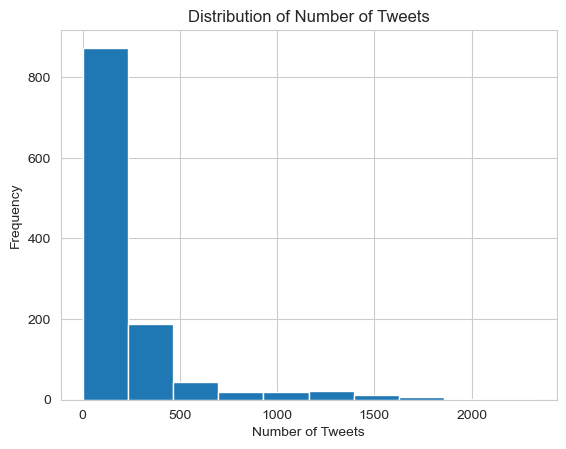

In [390]:
import matplotlib.pyplot as plt

# Counting daily tweets and sorting by date 
frequency_of_tweet = fifa_1['Date'].value_counts().sort_index()

# Ploting the frequency of tweets on a histogram to see its distribution
plt.hist(frequency_of_tweet.values, bins=10)

# labelling x and y axes labels and that of the title
plt.xlabel('Number of Tweets')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Tweets')

#Displaying the plot
plt.show()

In [401]:
# Converting the date column to a pandas DatetimeIndex to extract the timeframe from the date
hour = pd.DatetimeIndex(fifa_1['Date']).hour

# Categorizing the hours into sunrise, sunset, and night
bins = [0, 12, 17, 23]
labels = ['sunrise', 'sunset', 'night']
day_time = pd.cut(hour, bins=bins, labels=labels)
fifa_1 ['Time_of_day'] = day_time
fifa_1 ['Hour_of_day'] = hour

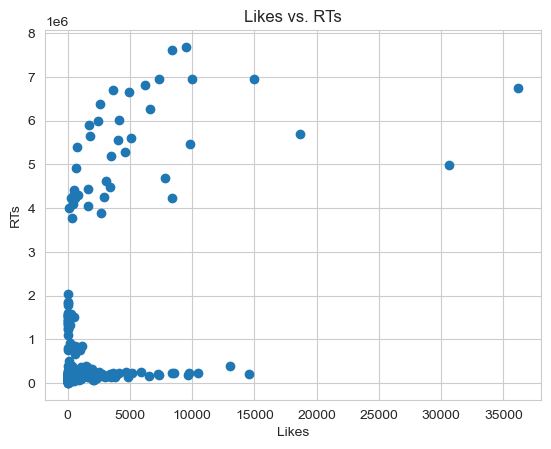

In [402]:
# Creating a DataFrame that computes the sum total of Likes and RTs happening daily
Total_Likes_AND_RTs = fifa_1.groupby(['Date'])[['Likes', 'RTs']].sum().reset_index()

#scatter plot of Likes vs RTs
plt.scatter(Total_Likes_AND_RTs['Likes'], Total_Likes_AND_RTs['RTs'])
plt.title('Likes vs. RTs')
plt.xlabel('Likes')
plt.ylabel('RTs')
plt.show()

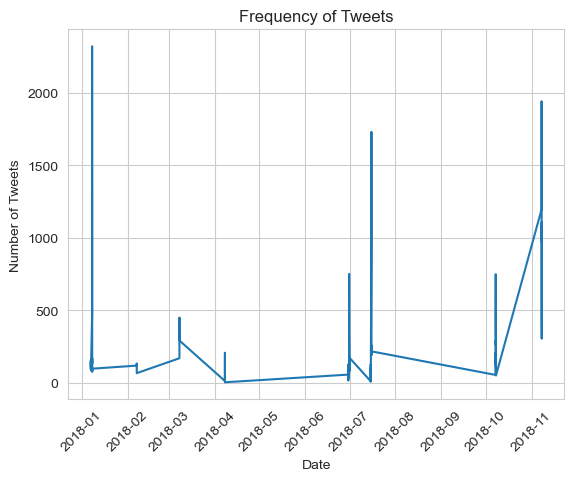

In [403]:
# Count the number of tweets per day and sort by date
frequency_of_tweet = fifa_1['Date'].value_counts().sort_index()

# Plot the frequency of tweets as a line graph
plt.plot(frequency_of_tweet.index, frequency_of_tweet.values)

# Add x-axis and y-axis labels and a title
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Frequency of Tweets')

# Customize the x-axis tick labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

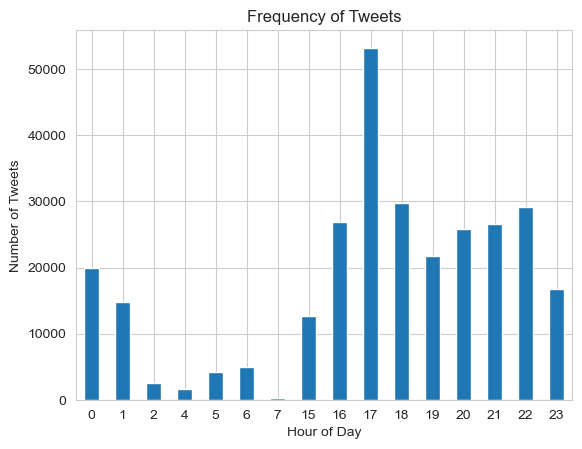

In [404]:
sum_likes_hourly = fifa_1.groupby('Hour_of_day')['Tweet'].count().plot.bar()

# Add x-axis and y-axis labels and a title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.title('Frequency of Tweets')

# labelling the x-axis
plt.xticks(rotation=360)

# Displaying the plot
plt.show()

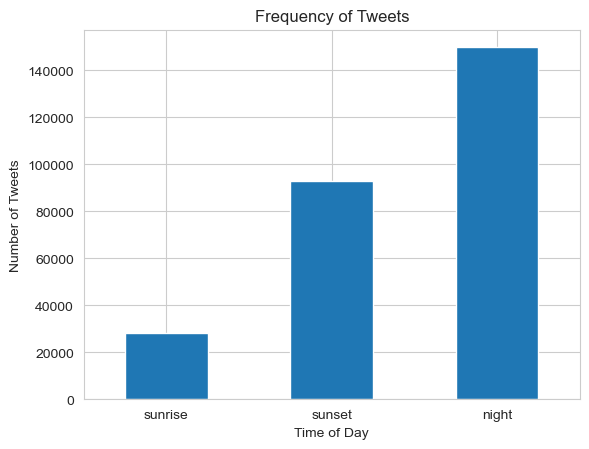

In [405]:
sum_tweets_time = fifa_1.groupby('Time_of_day')['Tweet'].count().plot.bar()

# Add x-axis and y-axis labels and a title
plt.xlabel('Time of Day')
plt.ylabel('Number of Tweets')
plt.title('Frequency of Tweets')

# Customize the x-axis tick labels
plt.xticks(rotation=360)

# Display the plot
plt.show()

# **DATA MININIG EXPLORATION**

### **1. Tokenizing and removing Stop words**

In [351]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
fifa_1['Tweet'] = fifa_1['Tweet'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [352]:
def tokenize_tweet(tweet):
    return nltk.word_tokenize(tweet)

fifa_1['Tweet'] = fifa_1['Tweet'].astype(str)
fifa_1['Tweet'] = fifa_1['Tweet'].apply(lambda x: nltk.word_tokenize(x))
fifa_1['Tweet'] = fifa_1['Tweet'].astype(str)

In [353]:
## removing stopwords
import nltk
import pandas as pd
nltk.download('stopwords') # Downloading the NLTK stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [354]:
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
mus_stop = stopwords.words("english")
mus_stopwords = nltk.corpus.stopwords.words('english') #Defining lists of stopwords

In [355]:
# Defining function to remove stopwords in tokens' list
def remove_stopwords(tokens):
       list_of_stopwords = stopwords.words('english')
       return[token for token in tokens if token.lower() not in list_of_stopwords] 

In [356]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
mus_stop = stopwords.words('english')

#increasing the stopwords list to incoporate other stopwords
mus_stopwords = ['https', 'I', 'That','This','There','amp', 'It']
for i in mus_stopwords:
    mus_stop.append(i)
print(mus_stop)

#applying it into the Tweet column of fifa_1
fifa_1["Tweet"] = fifa_1["Tweet"].apply(lambda x: ' '.join([word for word in x.split() if word not in (mus_stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [357]:
# removing texts less than 7 characters
# Defining function for removing shortwords from a text
def delete_shortwords(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) > 7]
    filtered_text = " ".join(filtered_words)
    return filtered_text

fifa_1['Tweet'] = fifa_1['Tweet'].apply(delete_shortwords)

In [358]:
fifa_1['length_of_tweet'] = fifa_1['Tweet'].apply(len)

### **2. Wordcloud**

In [359]:
!pip install wordcloud

from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
wordcloud = WordCloud(width=600, height=400, random_state=2, max_font_size=100).generate(' '.join(fifa_1['Tweet']))

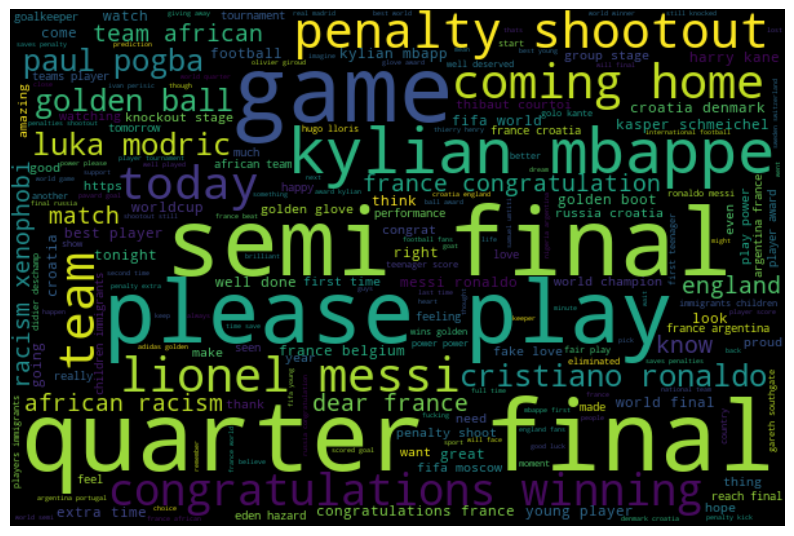

In [360]:
import plotly.express as px
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **3. Sentiment Analysis**

In [361]:
!pip install textblob

nltk.download('wordnet')


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob






[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/olayemimusei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [362]:
# calculating and assigning polarity to the clean_Tweet in the fifa_1 data 
fifa_1['polarity'] = fifa_1['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

#creating a sentiment column and assigning polarity values to positive > 0, negative < 0 and neutral=0 tweets
fifa_1['sentiment'] = fifa_1['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [363]:
# Counting and creating the dataframe for the negative, neutral and positive sentiments 
number_of_sentiment_counts = fifa_1.groupby(['sentiment'])['Tweet'].count().reset_index()
print(number_of_sentiment_counts)

  sentiment   Tweet
0  Negative   37047
1   Neutral  144794
2  Positive  109017


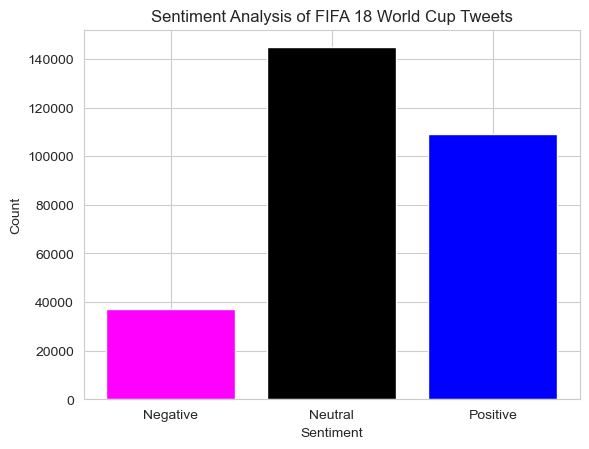

In [364]:
# Bar chart showing sentiments at the FIFA 18 World Cup
sns.set_style('whitegrid')
plt.bar(number_of_sentiment_counts['sentiment'], number_of_sentiment_counts['Tweet'], color=['magenta', 'black', 'blue'])
plt.title('Sentiment Analysis of FIFA 18 World Cup Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### **Top Five Tweets**

In [365]:
# Sort the DataFrame by number of likes and select the top 5 tweets
top_five_tweets = fifa_1.sort_values("Likes", ascending=False).head(5)

for i, tweet in top_five_tweets.iterrows():
    print(f"{tweet['Tweet']}\nLikes: {tweet['Likes']}\n")

"'else", "'missing", "'already",
Likes: 27042

"'with", "'completed",
Likes: 23882

"'raining", "'reigning", "'champions", "'sorry", "'sorry", "'about", "'that",
Likes: 13954

"'what", "'feeling",
Likes: 10126

"'captain", "'hugo", "'lifts",
Likes: 8201



In [366]:
top_five_tweets['polarity'] = top_five_tweets['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
top_five_tweets['sentiment'] = top_five_tweets['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [367]:
# Create a DataFrame with the counts of positive, negative, and neutral tweets
senti_Anal_count = top_five_tweets.groupby(['sentiment'])['Tweet'].count().reset_index()

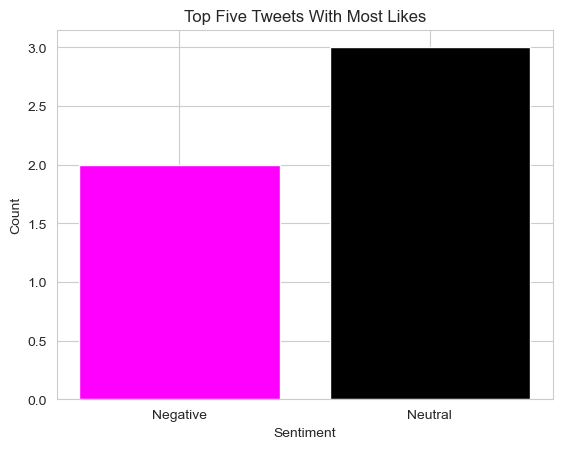

In [368]:
# plotting a bar chart for the outputted sentiment analysis
sns.set_style('whitegrid')
plt.bar(senti_Anal_count['sentiment'], senti_Anal_count['Tweet'], color=['magenta', 'black', 'blue'])
plt.title('Top Five Tweets With Most Likes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [369]:
from textblob import TextBlob

# creating the function that will calculate sentiment polarity of a text.
def mus_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# inputting the derived function to the fifa_1 dataframe
fifa_1['Sentiment_score'] = fifa_1['Tweet'].apply(mus_sentiment_score)


In [370]:
display(fifa_1)

,Date,Tweet,Likes,RTs,Url,Time_of_day,Hour_of_day,length_of_tweet,polarity,sentiment,Sentiment_score
0,2018-02-07 01:35:00,"""'only"", ""'goalkeepers"", ""'have"", ""'saved"", ""'...",0,477,0,sunrise,1,101,0.000000,Neutral,0.000000
1,2018-02-07 01:35:00,"""'scores"", ""'winning"", ""'penalty"", ""'send"", ""'...",0,1031,0,sunrise,1,123,0.500000,Positive,0.500000
2,2018-02-07 01:35:00,"""'tonight"", ""'have"", ""'game"",",0,488,0,sunrise,1,29,-0.400000,Negative,-0.400000
3,2018-02-07 01:35:00,"""'stronger"", ""'turn"", ""'music"", ""'that"", ""'pow...",0,0,0,sunrise,1,60,0.000000,Neutral,0.000000
5,2018-02-07 01:35:00,"""'looking"", ""'strong"", ""'going"", ""'into"", ""'kn...",0,153,0,sunrise,1,94,0.433333,Positive,0.433333
...,...,...,...,...,...,...,...,...,...,...,...
529982,2018-07-15 22:49:00,"""'guys"", ""'voted"", ""'right"", ""'congratulations...",0,0,0,night,22,72,0.285714,Positive,0.285714
529985,2018-07-15 22:49:00,"""'ronaldos"", ""'hattrick"", ""'germany"", ""'groups...",0,1138,0,night,22,144,-0.300000,Negative,-0.300000
529986,2018-07-15 22:49:00,"""'long"", ""'time"", ""'very"", ""'young"", ""'griezma...",0,6,0,night,22,85,0.040000,Positive,0.040000
529989,2018-07-15 22:49:00,"""'proud"",",0,1099,0,night,22,9,0.800000,Positive,0.800000


# **MACHINE LEARNING MODELS**

### 1. Linear Regression

In [371]:
# setting the seed so that it can be reproducable
import random
random.seed(1845)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


input_variable = fifa_1[['Url','RTs','polarity','Hour_of_day','length_of_tweet','Sentiment_score']]
target_variable = fifa_1[['Likes']]


# Split the data into training and testing sets
input_variable_train, input_variable_test, target_variable_train, target_variable_test = train_test_split(input_variable, target_variable, test_size=0.20)


# Train the model
model = LinearRegression()
model.fit(input_variable, target_variable)


# Make predictions on the testing set
y_pred = model.predict(input_variable_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(target_variable_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error
mae = mean_absolute_error(target_variable_test, y_pred)
print("Mean Absolute Error:", mae)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 4659.047438899682
Mean Absolute Error: 4.050214120904778
Root Mean Squared Error: 68.25721528819999


### 2. Decision Tree

In [372]:
# # Decision Tree Model

import pandas as pd
from sklearn.tree import DecisionTreeRegressor

a = input_variable
b = target_variable
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.20, random_state=40)



# Train the decision tree model
decT_model = DecisionTreeRegressor(random_state=40)
decT_model.fit(a_train, b_train)


# Make predictions on the testing set
y_pred = decT_model.predict(a_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(b_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error
mae = mean_absolute_error(target_variable_test, y_pred)
print("Mean Absolute Error:", mae)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)



Mean Squared Error: 3732.2526557126916
Mean Absolute Error: 3.9170764932822926
Root Mean Squared Error: 61.092165256378756


### 3. Random Forest

In [373]:
# # Random Forest Model

from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
a = input_variable
b = target_variable
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.20, random_state=40)

# Train the Random Forest model
ranF_model = RandomForestRegressor(random_state=40)
ranF_model.fit(a_train, b_train)



# Make predictions on the testing set
y_pred = ranF_model.predict(a_test)


# Evaluate the model using Mean Squared Error
mse = mean_squared_error(b_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error
mae = mean_absolute_error(target_variable_test, y_pred)
print("Mean Absolute Error:", mae)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

/var/folders/9s/tv63gxmn1r1dt_kjdy74g4wc0000gn/T/ipykernel_32259/1361925906.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranF_model.fit(a_train, b_train)


Mean Squared Error: 2827.584242549061
Mean Absolute Error: 3.922298821542951
Root Mean Squared Error: 53.1750340154951
